In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [16]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

1401600


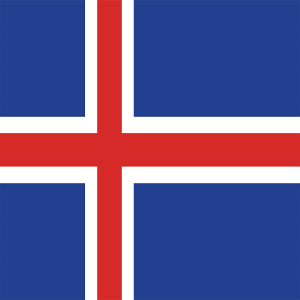

In [19]:
filter  = cv2.imread('/content/gdrive/My Drive/GSSummit/flag.jpg')
print(filter.size)
filter = cv2.resize(filter, (300,300))
# It converts the BGR color space of image to HSV color space 
hsv = cv2.cvtColor(filter, cv2.COLOR_BGR2HSV) 
    
# Threshold of blue in HSV space 
lower_blue = np.array([35, 140, 60])         # blue - lower = 35
upper_blue = np.array([255, 255, 180])      #  blue - upper = 255
 # preparing the mask to overlay 
mask = cv2.inRange(hsv, lower_blue, upper_blue) 
 
# The black region in the mask has the value of 0, 
# so when multiplied with original image removes all non-blue regions 
result = cv2.bitwise_and(filter, filter, mask = mask) 
cv2_imshow(filter) 


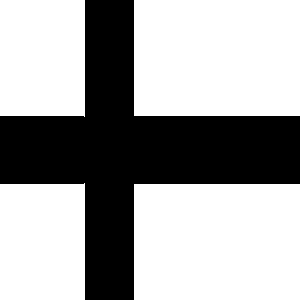

In [20]:
cv2_imshow(mask) 

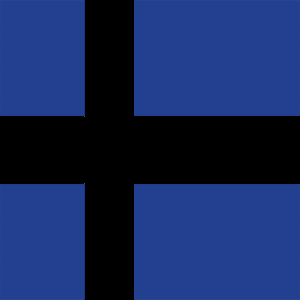

In [21]:
cv2_imshow(result) 

# Feature Detection in OpenCV

# 1. Smoothing And Blurring
- Averaging
- Gaussian
- Median
- Bilateral

Blurring means that each pixel in the image is mixed in with its surrounding pixel intensities.<br>
This “mixture” of pixels in a neighborhood becomes our blurred pixel

## Gaussian Blur
Blurring function needs a kernel


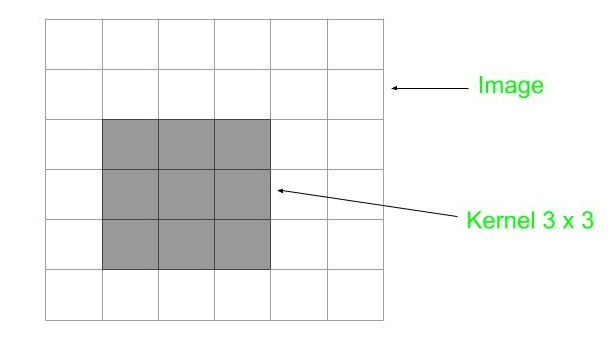

In [ ]:
bl = cv2.imread('/content/gdrive/My Drive/GSSummit/blur.jpg')
cv2_imshow(bl)

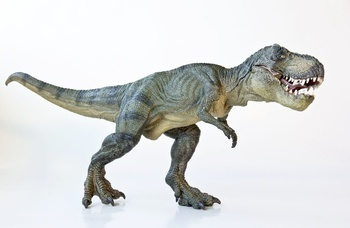

(228, 350, 3)

In [25]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png')
cv2_imshow(img)
# cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img.shape

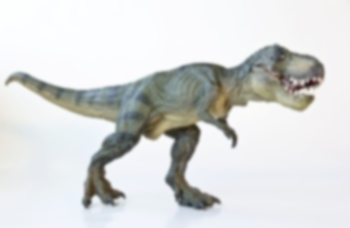

In [26]:
gaussian = cv2.GaussianBlur(img, (7,7), 0)
cv2_imshow(gaussian)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 2. THRESHOLDING
<h3>Thresholding is the binarization of an image.</h3><br>
In general, we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255.<br>
A simple thresholding example would be selecting a pixel value p,<br>
and then setting all pixel intensities less than p to zero, <br>
and all pixel values greater than p to 255.<br>
In this way,we are able to create a binary representation of the image.

''' Thresholding is a act of converting an image to binary form
    
    cv2.threshold(img, Threshold_Value, Max_value, Threshold_Type)
    here Threshold_value is the value above that every value becomes 255 (White) and
    everything below becomes 0 (Black)
 
'''

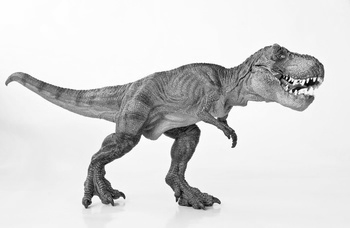

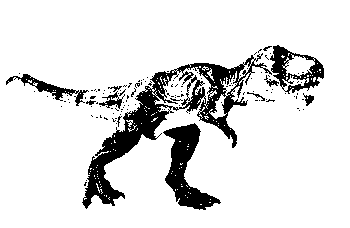

In [29]:
''' Loading Image and Converting it into Grayscale '''

img = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png', 0)
cv2_imshow(img)

''' Performing Thresholding '''

ret, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 3. Canny Edge Detection
Canny Edge Detection is a popular edge detection algorithm.<br>
It was developed by John F. Canny<br>
Edge detection is useful for finding boundaries of objects in an image<br>

<h3>Cv2.canny(img, min_value, max_value)</h3>

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/d.png', 0)
cv2_imshow(img)

''' Performing Edge Detection
'''

edge = cv2.Canny(img, 70, 120)
cv2_imshow(edge)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Any gradient value larger than threshold2 is considered to be an edge.<br>
Any value below threshold1 is considered not to be an edge. <br>
Values in between threshold1 and threshold2 are either classified as edges or non-edges
based on how their intensities are “connected”.

In [ ]:
''' Edge Detection With Blurring '''
gaussian = cv2.GaussianBlur(img.copy(), (5,5), 0)
edge = cv2.Canny(gaussian, 70, 120)
cv2_imshow('edge', edge)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 4. Contours
OpenCV provides methods to find “curves” in an image, called contours.<br>
A contour is a curve of points, with no gaps in the curve, having same color or intensity <br>
Contours are extremely useful for such things as shape approximation and analysis.

''' cv2.findContours(img, retrieval_mode, approximation_mode)

    retrieval_mode : external - stores only extrnal contours
                     list     - stores all contours

    approximation method : chain approx none - stores all boundary points
                           chain approx simple - stores only start and ending points
'''

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/images/house.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

# Finding Edges
edge = cv2.Canny(gray, 50, 120)
cv2_imshow('edge', edge)
# cv2.waitKey(0)


Numbers of contours are :  1


### Finding Contours

In [ ]:
''' Returning only External Contours '''
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Numbers of contours are : ', len(contours))
cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Numbers of contours are :  1


In [ ]:
''' Returning All Contours '''
contours, hierarchy = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print('Numbers of contours are : ', len(contours))
cv2.drawContours(img, contours, -1, (0, 0, 255), 3) 
cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Numbers of contours are :  7


## Using Contours to Count Coins

In [ ]:
import cv2
img = cv2.imread('/content/gdrive/My Drive/GSSummit/images/coins.png')
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # Converting Image to Grayscale
blurred = cv2.GaussianBlur(gray, (11, 11), 0)  #  Blurring the Image
edged = cv2.Canny(blurred, 30, 150)           #   Detecting Edges
cv2_imshow(edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<h2>cv2.drawContours(img, contours, -1, (0, 0, 255), 3) <h2>

In [ ]:
cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I found {} coins in the image".format(len(cnts)))

coins = img.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
cv2_imshow(coins)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

I found 9 coins in the image


# Project - Live Sketcher

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
	ret, frame = cap.read()                        # Reading the Frame
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)# Converting it to GrayScale
	blur = cv2.GaussianBlur(gray , (5,5), 0)     #  Blurring
	edge = cv2.Canny(blur, 70, 110)             #   Finding Edges
	ret, thresh = cv2.threshold(edge, 170, 255, cv2.THRESH_BINARY_INV)  # Thresholding
	cv2_imshow(thresh)

	if cv2.waitKey(33) == 27:
		break;
cap.release()
cv2.destroyAllWindows()


# 5. Morphological Transformations

Dilation and Erosion are known as Morphological Operations.<br>
They are often performed on Binary Images, Similar to Contour Detection.<br>
Dilation enlarges bright, white pixels in an image by adding pixels to the perceived boundaries of objects in that image.<br>
Erosion does the opposite, it removes the pixels along object boundaries and shrink the size of object.<br>
<br>


To <b>Erode </b> an image we can use <b>cv2.erode(img, kernel, no of iterations)</b>

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/j.png',0)
cv2_imshow(img)

''' Creating a 5*5 Kernel
          [[5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5]          
          ]
'''
kernel = np.ones((5,5),np.uint8)

''' Performing Erosion '''
erosion = cv2_erode(img,kernel,iterations = 1)
cv2.imshow(erosion)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

To <b>Dilate </b> an image we can use <b>cv2.dilate(img, kernel, no of iterations)</b>

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/GSSummit/j.png',0)
cv2_imshow(img)

''' Creating a 5*5 Kernel
          [[5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5],
           [5, 5, 5, 5, 5]          
          ]
'''
kernel = np.ones((5,5),np.uint8)

''' Performing Dilation '''
dilation = cv2.dilate(img,kernel,iterations = 1)
cv2_imshow(dilation)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Opening - erosion followed by dilation

In [ ]:
opening_img = cv2.imread('/content/gdrive/My Drive/GSSummit/opening.png', 0)
cv2_imshow(opening_img)
opening = cv2.morphologyEx(opening_img, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Dilation - dilation followed by erosion

In [ ]:
closing_img = cv2.imread('/content/gdrive/My Drive/GSSummit/closing.png', 0)
cv2_imshow(_closing_img)
closing = cv2.morphologyEx(closing_img, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()